# Interaction Plot Example: Clinical Trial
This notebook demonstrates the use of an interaction plot to explore the interaction between drug dosage and gender on blood pressure reduction.

In [1]:
# Imports
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Note: you may need to restart the kernel to use updated packages.


## Simulate Clinical Trial Data
- Dosage levels: Low, Medium, High
- Gender: Male, Female
- Outcome: Blood pressure reduction (mmHg)

In [2]:
# Simulate data
np.random.seed(42)
n = 90
df = pd.DataFrame({
    "Dosage": np.repeat(["Low", "Medium", "High"], 30),
    "Gender": np.tile(["Male", "Female"] * 45, 1)[:90],
    "BP_Reduction": np.random.normal(loc=5, scale=2, size=90)
})

# Add dosage effect
df.loc[df["Dosage"] == "Medium", "BP_Reduction"] += 3
df.loc[df["Dosage"] == "High", "BP_Reduction"] += 5

# Add interaction: higher effect for females at high dosage
df.loc[(df["Dosage"] == "High") & (df["Gender"] == "Female"), "BP_Reduction"] += 2

# Display first few rows
df.head()

,Dosage,Gender,BP_Reduction
0,Low,Male,5.993428
1,Low,Female,4.723471
2,Low,Male,6.295377
3,Low,Female,8.046060
4,Low,Male,4.531693


## Plot the Interaction

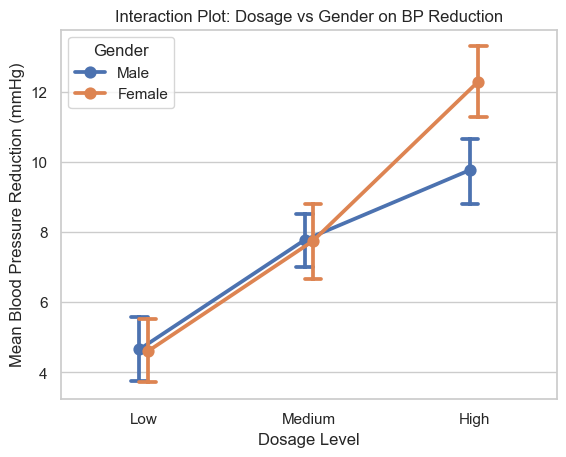

In [3]:
# Plot interaction between dosage and gender
sns.pointplot(data=df, x="Dosage", y="BP_Reduction", hue="Gender", capsize=0.1, dodge=True)
plt.title("Interaction Plot: Dosage vs Gender on BP Reduction")
plt.ylabel("Mean Blood Pressure Reduction (mmHg)")
plt.xlabel("Dosage Level")
plt.show()